# Redes Neuronales Recurrentes RNN 1

Perceptron multicapa

![](https://www.researchgate.net/profile/Mohamed_Zahran6/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png)

En este modelo tenemos una serie de capas, cada capa formada por un número determinado de `perceptrones` (o neuronas artificiales, la unidad básica que forma las `redes neuronales` de la que también hemos hablado en gran cantidad en posts anteriores). Si bien este modelo es muy útil y potente, lo hemos utilizado por ejemplo para clasificar imágenes, existen otras aplicaciones para las cuales esta arquitectura se ve limitada. 

Una familia de aplicaciones en las que nuestro `MLP` no será muy efectivo es aquellas en las que tratemos con `datos secuenciales`, como por ejemplo `series temporales` o aplicaciones de `lenguaje` en las que nuestros datos están organizados en secuencias de longitud variable. 

En este post vamos a introducir una nueva `arquitectura` diseñada específicamente para tratar con datos secuenciales: las `redes neuronales recurrentes` (RNNs).

## Definición

En una red neuronal *feed forward* la información solo fluye en una dirección, desde la capa de entrada hasta la salida. Nuestro `MLP` es un ejemplo de este tipo de redes. 

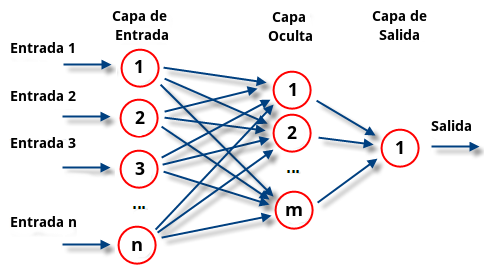

Estructura de una red neuronal recurrente

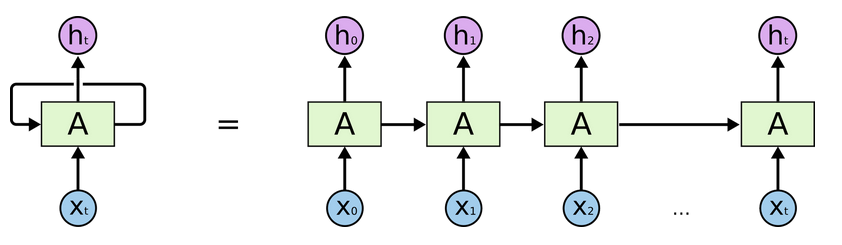

En las redes neuronales recurrentes las capas  tienen memoria, a diferencia de otras redes como FFN

Una `red recurrente` es muy similar a un `MLP` en el que además tenemos conexiones apuntando hacia detrás.

![](https://miro.medium.com/max/2544/1*aIT6tmnk3qHpStkOX3gGcQ.png)

En la imágen anterior tienes un ejemplo de la `RNN` más sencilla que existe, en la que sólo tenemos una entrada, una neurona en la capa oculta y una salida. En el caso del `MLP` calcularíamos la salida con la siguiente fórmula

$$ \mathbf{y} = \mathbf{W}_y \mathbf{h} = \mathbf{W}_y f(\mathbf{W}_x \mathbf{x}) $$

Sin embargo, en una `RNN` además de las entradas que ya conocemos, $x$, introduciremos las salidas de la capa oculta en el instante anterior, $h$, como entradas adicionales, las cuales irán multiplicadas por su propia matriz de pesos

$$ \mathbf{y}_t = \mathbf{W}_y \mathbf{h}_t = \mathbf{W}_y f(\mathbf{W}_x \mathbf{x}_t + \mathbf{W}_h \mathbf{h}_{t-1}) $$

En los ejemplos que hemos visto anteriormente, cada muestra en el dataset estaba caracterizado por un número determinado de características (por ejemplo, para clasificar imágenes, cada entrada correspondía al valor de cada píxel de la imagen). Sin embargo, al trabajar con datos secuenciales, nuestro dataset estará formado por secuencias de elementos, cada uno de ellos caracterizado por un número determinado de características (para seguir con el ejemplo de imágenes, podrías considerar un vídeo en el cada elemento sería un frame, una imagen). Denotaremos a cada elemento de la secuencia como $\mathbf{x}_t$ donde $\mathbf{x}$ es el vector de características del elemento en la secuencia $t$. 

## Tipos de RNNs


Esta nueva arquitectura abre un nuevo mundo de posibilidades en el que podemos llevar a cabo nuevas tareas dependiendo de la configuración de entradas/salidas que utilicemos

![](https://i.stack.imgur.com/b4sus.jpg)

La tipología *one-to-one* corresponde al `MLP`, puedes considerarlo como una secuencia de longitud 1, el resto de tipologías nos permiten tareas como clasificación de secuencias o regresión a un valor (*many-to-one*) o regresión a varios valores futuros (*many-to-many*). 

## Entrenando RNNs

Para entrenar `RNNs` utilizaremos exactamente el mismo algoritmo que hemos utilizado hasta ahora: el algoritmo de *bakpropagation*. Ahora, sin embargo, hay que tener en cuenta que podemos tener gradientes fluyendo desde cualquiera de las salidas de la red neuronal, por lo que en un mismo paso de actualización es posible actualizar los pesos con (potencialmente) muchos gradientes distintos. Esto puede resultar en ciertos problemas durante el entrenamiento de los que hablaremos más adelante.

![](https://s3.ap-south-1.amazonaws.com/techleer/191.png)

Obviamente, en los frameworks de `redes neuronales` que ya conocemos esto ya está implementado por lo que no tenemos que preocuparnos.

#Tipos de capas en una RNN

**Capa SimpleRNN:** Esta capa implementa una red neuronal recurrente simple, también conocida como red neuronal de Elman. Esta capa tiene una salida y una entrada recurrente.

**Capa LSTM:** Esta capa implementa una red neuronal de memoria a largo plazo, que es capaz de recordar información durante períodos de tiempo más largos que una red neuronal recurrente simple. Esta capa tiene tres salidas y una entrada recurrente.

**Capa GRU:** Esta capa implementa una unidad de puerta de actualización recurrente, que es capaz de aprender a ignorar o actualizar información en la entrada. Esta capa tiene dos salidas y una entrada recurrente.

**Capa Bidireccional:**Esta capa es una combinación de dos capas RNN, una que lee la secuencia de entrada en el orden normal y otra que lee la secuencia en orden inverso. Las salidas de ambas capas se concatenan y se pasan a la siguiente capa.

**Capa de embedding** en se utiliza para representar los datos de entrada como vectores densos de baja dimensión. Esta capa es comúnmente utilizada en modelos de procesamiento de lenguaje natural (NLP) para representar palabras como vectores numéricos densos.

La capa de embedding se utiliza para mapear cada palabra en un espacio vectorial. Cada palabra se representa como un vector denso, donde cada dimensión del vector representa una característica de la palabra. La capa de embedding se entrena junto con el resto del modelo, y las representaciones de palabras se ajustan a medida que el modelo aprende.

La capa de embedding toma una entrada de enteros, donde cada entero representa una palabra. Cada entero se mapea a un vector de palabras usando una tabla de búsqueda. La tabla de búsqueda es una matriz de tamaño (vocabulary_size x embedding_dimension), donde vocabulary_size es el tamaño del vocabulario (el número total de palabras distintas en el conjunto de datos) y embedding_dimension es la dimensión del vector de palabras.

En los proximos colab utilizaremos distintas capas mencionadas